In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats

In [2]:
#Setting options
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",None)
pd.set_option("display.float_format","{:,.2f}".format)


## Goal to find the most selling category

In [3]:
#importing data set
df = pd.read_csv(r"E:\Pakistan Largest Ecommerce Dataset.csv", low_memory = False)
df.head(10)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,"211,131.00",complete,7/1/2016,kreations_YI 06-L,"1,950.00",1.00,"1,950.00",100147443,Women's Fashion,\N,0.00,cod,7/1/2016,#REF!,"1,950","2,016.00",7.00,2016-7,7-2016,FY17,1.00,NaN,NaN,NaN,NaN,NaN
1,"211,133.00",canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,240.00,1.00,240.00,100147444,Beauty & Grooming,\N,0.00,cod,7/1/2016,Gross,240,"2,016.00",7.00,2016-7,7-2016,FY17,2.00,NaN,NaN,NaN,NaN,NaN
2,"211,134.00",canceled,7/1/2016,Ego_UP0017-999-MR0,"2,450.00",1.00,"2,450.00",100147445,Women's Fashion,\N,0.00,cod,7/1/2016,Gross,"2,450","2,016.00",7.00,2016-7,7-2016,FY17,3.00,NaN,NaN,NaN,NaN,NaN
3,"211,135.00",complete,7/1/2016,kcc_krone deal,360.00,1.00,60.00,100147446,Beauty & Grooming,R-FSD-52352,300.00,cod,7/1/2016,Net,360,"2,016.00",7.00,2016-7,7-2016,FY17,4.00,NaN,NaN,NaN,NaN,NaN
4,"211,136.00",order_refunded,7/1/2016,BK7010400AG,555.00,2.00,"1,110.00",100147447,Soghaat,\N,0.00,cod,7/1/2016,Valid,"1,110","2,016.00",7.00,2016-7,7-2016,FY17,5.00,NaN,NaN,NaN,NaN,NaN
5,"211,137.00",canceled,7/1/2016,UK_Namkino All In One 200 Gms,80.00,1.00,80.00,100147448,Soghaat,\N,0.00,cod,7/1/2016,Gross,80,"2,016.00",7.00,2016-7,7-2016,FY17,6.00,NaN,NaN,NaN,NaN,NaN
6,"211,138.00",complete,7/1/2016,kcc_krone deal,360.00,1.00,60.00,100147449,Beauty & Grooming,\N,300.00,cod,7/1/2016,Net,360,"2,016.00",7.00,2016-7,7-2016,FY17,7.00,NaN,NaN,NaN,NaN,NaN
7,"211,139.00",complete,7/1/2016,UK_Namkino Mix Nimco 400 Gms,170.00,1.00,170.00,100147450,Soghaat,\N,0.00,cod,7/1/2016,Net,170,"2,016.00",7.00,2016-7,7-2016,FY17,6.00,NaN,NaN,NaN,NaN,NaN
8,"211,140.00",canceled,7/1/2016,Apple iPhone 6S 64GB,"96,499.00",1.00,"96,499.00",100147451,Mobiles & Tablets,\N,0.00,ublcreditcard,7/1/2016,Gross,"96,499","2,016.00",7.00,2016-7,7-2016,FY17,8.00,NaN,NaN,NaN,NaN,NaN
9,"211,141.00",canceled,7/1/2016,Apple iPhone 6S 64GB,"96,499.00",1.00,"96,499.00",100147452,Mobiles & Tablets,\N,0.00,mygateway,7/1/2016,Gross,"96,499","2,016.00",7.00,2016-7,7-2016,FY17,8.00,NaN,NaN,NaN,NaN,NaN


In [4]:
#Removing all missing rows and columns from the data
df.dropna(how = "all", inplace = True)
df.columns
df.drop(['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'], axis = 1, inplace = True)
df.columns


Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID'],
      dtype='object')

In [5]:
#Renaming Columns that aren't named good
df = df.rename(columns={
"status":"order_status",
"sku":"product_id",
"qty_ordered":"quantity",
"grand_total":"total_price",
"category_name_1":"category",
"discount_amount":"discount",
"Working Date":"working_date",
"MV":"market_value",
"Customer ID":"customer_id",
"BI Status":"bi_status",
"MV":"market_value",
"Year":"year",
"Month":"month",
"Customer Since":"customer_since",
"M-Y":"month_year",
"FY":"financial_year"
})
df.columns

Index(['item_id', 'order_status', 'created_at', 'product_id', 'price',
       'quantity', 'total_price', 'increment_id', 'category',
       'sales_commission_code', 'discount', 'payment_method', 'working_date',
       'bi_status', ' MV ', 'year', 'month', 'customer_since', 'month_year',
       'financial_year', 'customer_id'],
      dtype='object')

In [6]:
#Removing Duplicates
df.duplicated().sum()

np.int64(0)

In [7]:
#Fixing Formats
df["created_at"]= pd.to_datetime(df["created_at"])
df["customer_since"]= pd.to_datetime(df["customer_since"])
df["month_year"]= pd.to_datetime(df["month_year"])

In [8]:
#Changing names of unique values if they are not understandable or good
df["category"].value_counts()
df["category"] = df["category"].replace(r"\N", "Others")

In [9]:
#filling Missing values
df.isna().sum()
df['order_status']= df['order_status'].fillna(df["order_status"].mode()[0])
df['product_id']= df['product_id'].fillna(df["product_id"].mode()[0])
df['category']= df['category'].fillna(df["category"].mode()[0])
df['customer_since']= df['customer_since'].fillna(df["customer_since"].mode()[0])
df['customer_id']= df['customer_id'].fillna(df["customer_id"].mode()[0])
df['sales_commission_code'] = df['sales_commission_code'].fillna(df["sales_commission_code"].mode()[0])
df.isna().sum()


item_id                  0
order_status             0
created_at               0
product_id               0
price                    0
quantity                 0
total_price              0
increment_id             0
category                 0
sales_commission_code    0
discount                 0
payment_method           0
working_date             0
bi_status                0
 MV                      0
year                     0
month                    0
customer_since           0
month_year               0
financial_year           0
customer_id              0
dtype: int64

In [10]:
#handling same variables of the data set
df["order_status"].value_counts()
df["order_status"] = df["order_status"].replace("received", "complete")
df["order_status"] = df["order_status"].replace("paid", "complete")
df["order_status"] = df["order_status"].replace("closed", "canceled")
df["order_status"] = df["order_status"].replace("fraud", "canceled")
df["order_status"] = df["order_status"].replace("order_refunded", "refund")
df["order_status"] = df["order_status"].replace("exchange", "refund")
df["order_status"] = df["order_status"].replace("processing", "pending")
df["order_status"] = df["order_status"].replace("pending_paypal", "pending")
df["order_status"] = df["order_status"].replace("cod", "pending")
#Using Raw cause it gives error other wise
df["order_status"] = df["order_status"].replace(r"\N", "pending")
df["order_status"] = df["order_status"].replace("payment_review", "pending")
df["order_status"] = df["order_status"].replace("holded", "pending")


In [11]:
#Handling Outliers
#df.loc[df["order_status"] == "refund", "quantity"].max()
#304 is the highest
#df.loc[df["order_status"] == "complete", "quantity"].max()
#1000 is the highest

#z_scores = stats.zscore(df['total_price'])
#outliers = df[abs(z_scores) > 3]
#print(outliers)


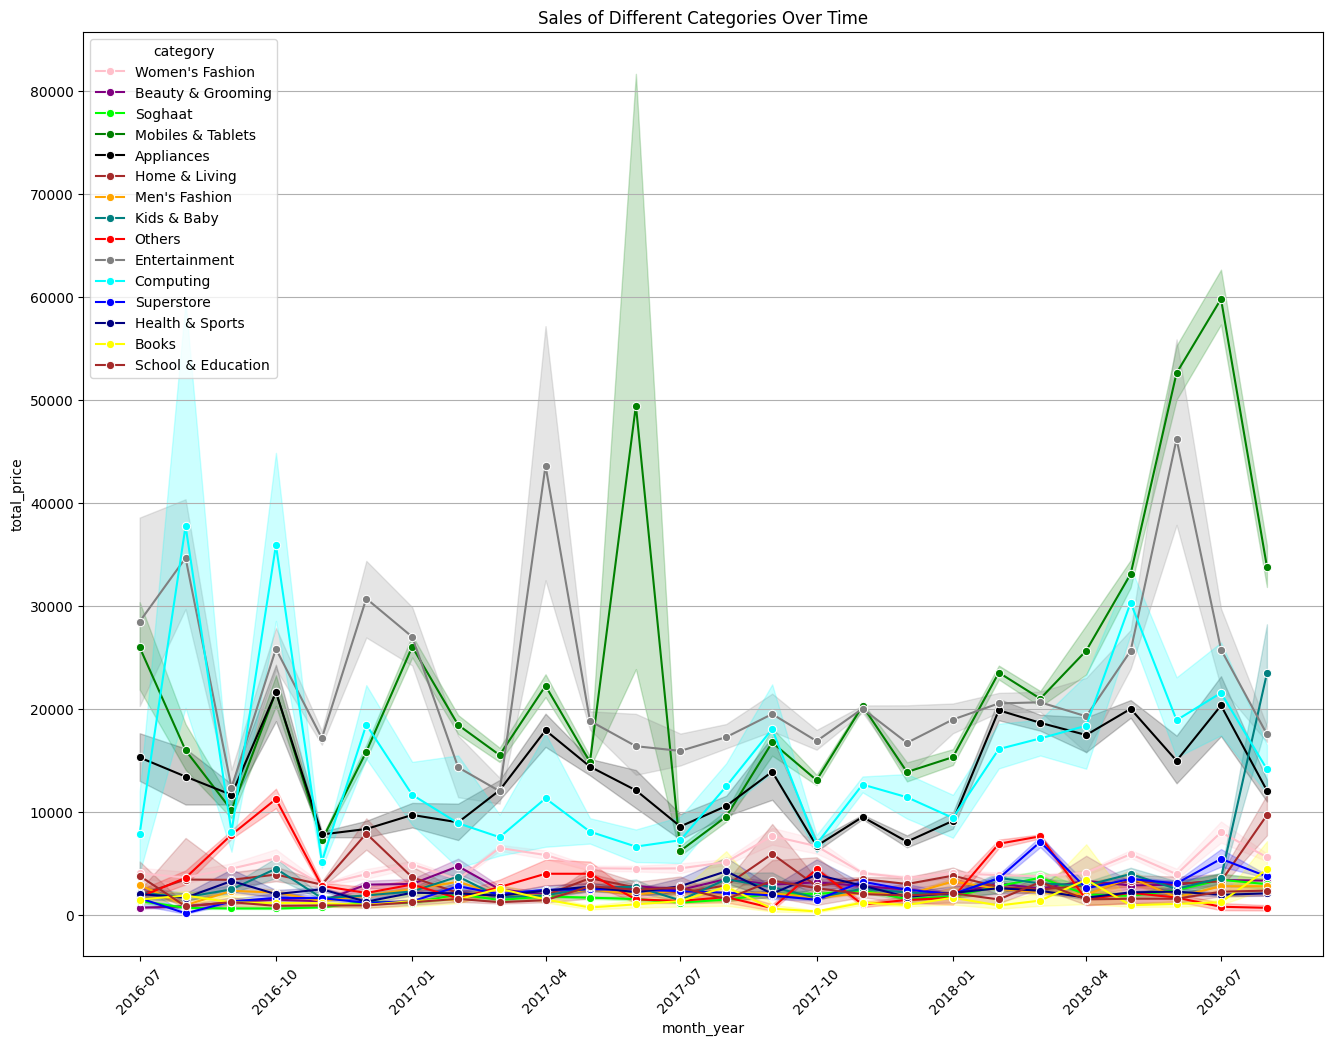

In [12]:
#Making Line graph for the Catagories
#Describing Palette
#plotting outliers
palette = ({
"Others":"red",
"Computing":"cyan",
"Entertainment":"gray",
"Appliances":"black",
"Mobiles & Tablets":"green",
"Men's Fashion":"orange",
"Women's Fashion":"pink",
"Superstore":"blue",
"Beauty & Grooming":"purple",
"Health & Sports":"navy",
"Home & Living":"brown",
"Soghaat":"lime",
"Kids & Baby":"teal",
"School & Education":"brown",
"Books":"yellow"
})
#Making Graph now
plt.figure(figsize=(16,12))
sns.lineplot(x = "month_year", y = "total_price", data = df, hue = "category",palette= palette, marker = "o")
plt.title("Sales of Different Categories Over Time")
plt.xticks(rotation = 45)
plt.grid(axis = "y")
plt.show()


In [14]:
sns.boxplot(x = "total_price", y = "category", data = outliers1, palette = palette)

NameError: name 'outliers1' is not defined

In [ ]:
months = [ 
    "2016-06-01",
    "2017-07-01",
    "2017-11-01",
    "2018-05-01",
    "2018-06-01",
    "2018-07-01",
    "2018-08-01"
 ]
#06 2016, 07, 11 2017, 05, 06, 07, 08 2018
events = df[df["month_year"].isin(months)]
events
normal = df[~df["month_year"].isin(months)]
normal

,item_id,order_status,created_at,product_id,price,quantity,total_price,increment_id,category,sales_commission_code,discount,payment_method,working_date,bi_status,MV,year,month,customer_since,month_year,financial_year,customer_id
0,"211,131.00",complete,2016-07-01,kreations_YI 06-L,"1,950.00",1.00,"1,950.00",100147443,Women's Fashion,\N,0.00,cod,7/1/2016,#REF!,"1,950","2,016.00",7.00,2016-07-01,2016-07-01,FY17,1.00
1,"211,133.00",canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,240.00,1.00,240.00,100147444,Beauty & Grooming,\N,0.00,cod,7/1/2016,Gross,240,"2,016.00",7.00,2016-07-01,2016-07-01,FY17,2.00
2,"211,134.00",canceled,2016-07-01,Ego_UP0017-999-MR0,"2,450.00",1.00,"2,450.00",100147445,Women's Fashion,\N,0.00,cod,7/1/2016,Gross,"2,450","2,016.00",7.00,2016-07-01,2016-07-01,FY17,3.00
3,"211,135.00",complete,2016-07-01,kcc_krone deal,360.00,1.00,60.00,100147446,Beauty & Grooming,R-FSD-52352,300.00,cod,7/1/2016,Net,360,"2,016.00",7.00,2016-07-01,2016-07-01,FY17,4.00
4,"211,136.00",refund,2016-07-01,BK7010400AG,555.00,2.00,"1,110.00",100147447,Soghaat,\N,0.00,cod,7/1/2016,Valid,"1,110","2,016.00",7.00,2016-07-01,2016-07-01,FY17,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518980,"833,093.00",refund,2018-04-30,WOFASI5AE323E458A80,"11,495.00",1.00,"11,495.00",100517306,Women's Fashion,\N,0.00,cod,4/30/2018,Valid,"11,495","2,018.00",4.00,2018-04-01,2018-04-01,FY18,"106,096.00"
518981,"833,094.00",canceled,2018-04-30,WOFJUN59FB0FA5C54ED,"2,442.50",1.00,"2,442.50",100517307,Women's Fashion,\N,0.00,cod,4/30/2018,Gross,"2,443","2,018.00",4.00,2017-11-01,2018-04-01,FY18,"67,162.00"
518982,"833,095.00",complete,2018-04-30,MATQMO5ACC74CAEC97E,"9,999.00",1.00,"9,999.00",100517308,Mobiles & Tablets,\N,0.00,bankalfalah,4/30/2018,Net,"9,999","2,018.00",4.00,2018-04-01,2018-04-01,FY18,"106,097.00"
518983,"833,096.00",complete,2018-04-30,APPBIN59AC8F3A515E5,"1,399.00",1.00,"1,399.00",100517309,Appliances,\N,0.00,cod,4/30/2018,Net,"1,399","2,018.00",4.00,2018-04-01,2018-04-01,FY18,"106,095.00"


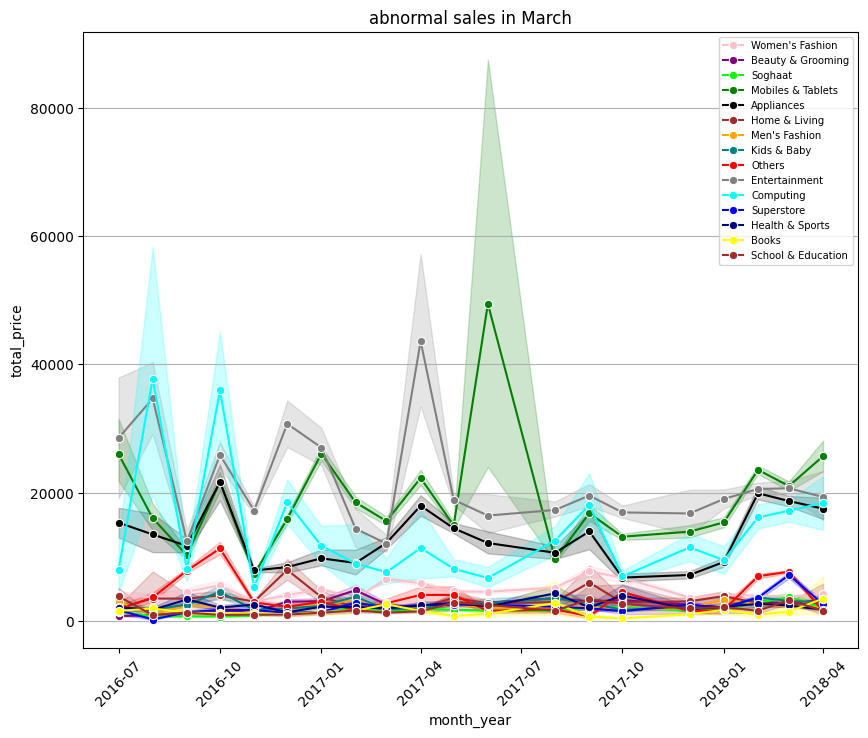

In [27]:
#plotting line graph for outliers section(Section with high sales) 
plt.figure(figsize=(10,8))
sns.lineplot(x = "month_year", y = "total_price", data = normal, hue = "category",palette= palette, marker = "o")
plt.title("abnormal sales in March")
plt.xticks(rotation = 45)
plt.grid(axis = "y")
plt.legend(
fontsize = 7.2
)
plt.show()

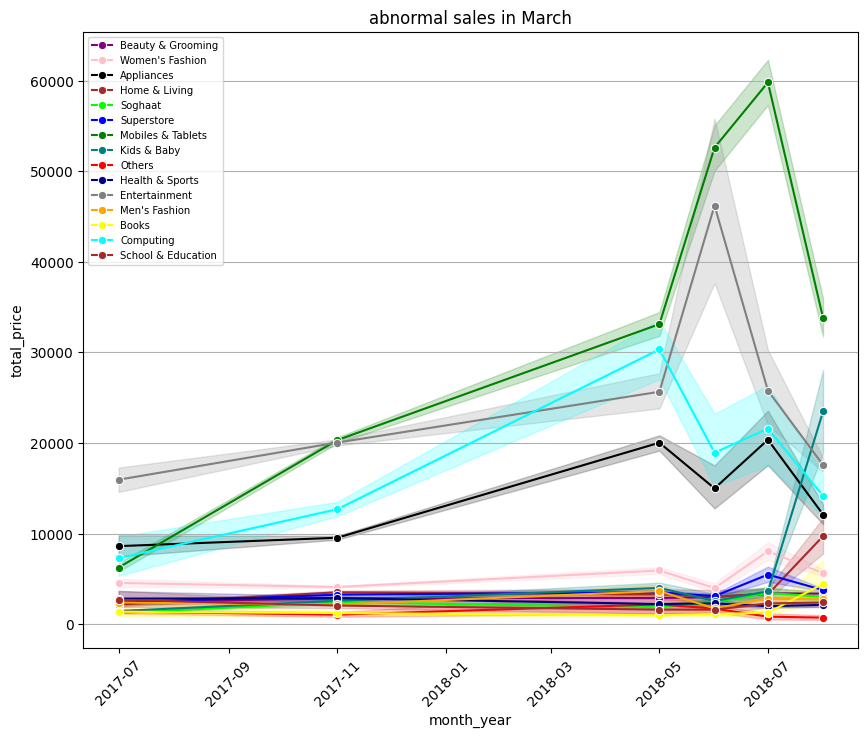

In [25]:
#plotting line graph for outliers section(Section with high sales) 
plt.figure(figsize=(10,8))
sns.lineplot(x = "month_year", y = "total_price", data = events, hue = "category",palette= palette, marker = "o")
plt.title("abnormal sales in March")
plt.xticks(rotation = 45)
plt.grid(axis = "y")
plt.legend(
fontsize = 7.2
)
plt.show()

In [33]:
print("This is the time when sales of things reached to there peak")
print("Just cause of Eid, Category 'others'(bangles and Henna), reached out max in quantity")

This is the time when sales of things reached to there peak
Just cause of Eid, Category 'others'(bangles and Henna), reached out max in quantity


In [34]:
print("these are all with negative values and order status like canceled and everything")
print("lets start doing with seprate each to get more of a good view of the data set for outliers")


these are all with negative values and order status like canceled and everything
lets start doing with seprate each to get more of a good view of the data set for outliers


In [ ]:
outliers1 = outliers.groupby(["category", "order_status"]).agg({
"price":"sum",
"quantity":"sum",
"total_price":"sum",
"discount":"sum"
}).reset_index()
outliers1

,category,order_status,price,quantity,total_price,discount
0,Appliances,canceled,"86,177,036.50","5,384.00","104,746,359.83","6,372,872.15"
1,Appliances,complete,"62,891,703.69","5,810.00","70,779,442.98","6,847,614.76"
2,Appliances,pending,"51,110.00",22.00,"71,393.67","2,614.93"
3,Appliances,refund,"16,310,047.00","1,315.00","17,938,465.46","883,988.78"
4,Beauty & Grooming,canceled,"2,579,762.25","2,201.00","7,829,452.94","439,780.81"
5,Beauty & Grooming,complete,"2,599,799.75","4,393.00","7,704,990.38","799,825.57"
6,Beauty & Grooming,pending,"22,704.80",72.00,"129,644.15",800.00
7,Beauty & Grooming,refund,"770,219.40",879.00,"1,625,039.55","72,758.64"
8,Books,canceled,"25,855.65",109.00,"172,849.57","3,269.28"
9,Books,complete,"74,530.90",314.00,"195,378.48","8,685.57"


In [37]:
appliances = outliers1[outliers1['category']== "Appliances"].reset_index()
mobiles = outliers1[outliers1['category']== "Mobiles & Tablets"].reset_index()
entertainment = outliers1[outliers1['category']== "Entertainment"].reset_index()
computing = outliers1[outliers1['category']== "Computing"].reset_index()

In [38]:
appliances.drop(["index"], axis = 1, inplace = True)
mobiles.drop(["index"], axis = 1, inplace = True)
entertainment.drop(["index"], axis = 1, inplace = True)
computing.drop(["index"], axis = 1, inplace = True)


Plotting Graphs


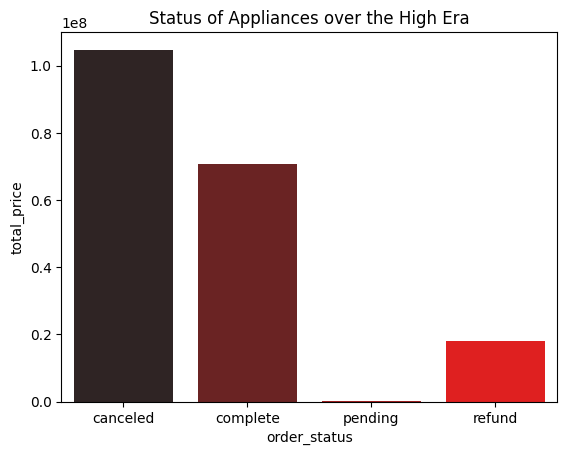

In [39]:
print("Plotting Graphs")
sns.barplot(x= "order_status", y = "total_price", data=appliances, palette= "dark:red")
plt.title("Status of Appliances over the High Era")
plt.show()


In [40]:
print("the value of cancelled is of the charts lets do it without it for once, to get a clear picture of the others")
appliances = appliances[~(appliances['order_status']== "canceled")]
appliances


the value of cancelled is of the charts lets do it without it for once, to get a clear picture of the others


,category,order_status,price,quantity,total_price,discount
1,Appliances,complete,"62,891,703.69","5,810.00","70,779,442.98","6,847,614.76"
2,Appliances,pending,"51,110.00",22.00,"71,393.67","2,614.93"
3,Appliances,refund,"16,310,047.00","1,315.00","17,938,465.46","883,988.78"


Plotting Graphs


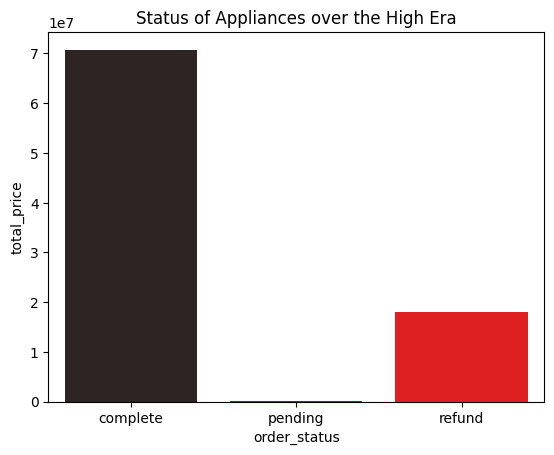

In [41]:
print("Plotting Graphs")
sns.barplot(x= "order_status", y = "total_price", data=appliances, palette= "dark:red")
plt.title("Status of Appliances over the High Era")
plt.show()


Plotting Graphs


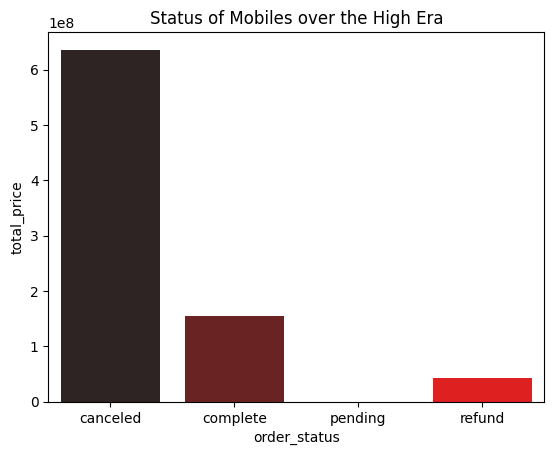

In [42]:
mobiles
print("Plotting Graphs")
sns.barplot(x= "order_status", y = "total_price", data=mobiles, palette= "dark:red")
plt.title("Status of Mobiles over the High Era")
plt.show()


Plotting Graphs


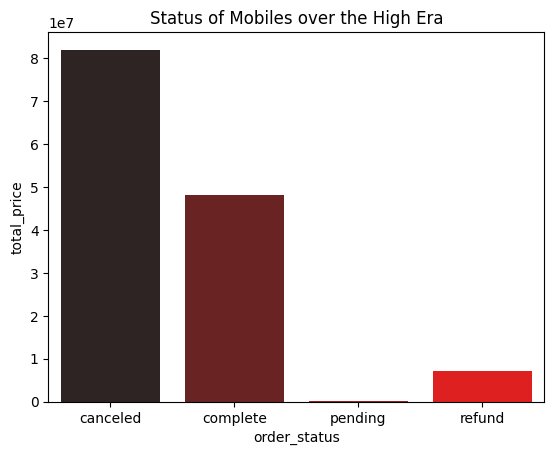

In [43]:
entertainment
print("Plotting Graphs")
sns.barplot(x= "order_status", y = "total_price", data=entertainment, palette= "dark:red")
plt.title("Status of Mobiles over the High Era")
plt.show()
